In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
# changed split to 70-20-10

df = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/lr.csv")
df_deduped = pd.read_csv("https://raw.githubusercontent.com/bournenadia26/cs131/refs/heads/main/lr_deduped.csv")

df = df.rename(columns={df.columns[0]: "label"}) #rename label col (has no name)
df_deduped = df_deduped.rename(columns={df_deduped.columns[0]: "label"})

df = df.sample(frac=1, random_state=1).reset_index(drop=True) #to shuffle
df_deduped = df_deduped.sample(frac=1, random_state=1).reset_index(drop=True)

train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=1, stratify=df["label"]) # split
train_df, val_df = train_test_split(train_val_df, test_size=2/9, random_state=1, stratify=train_val_df["label"])
train_val_df_dd, test_df_dd = train_test_split(df_deduped, test_size=0.1, random_state=1, stratify=df_deduped["label"])
train_df_dd, val_df_dd = train_test_split(train_val_df_dd, test_size=2/9, random_state=1, stratify=train_val_df_dd["label"])

X_train = train_df.iloc[:, 1:].to_numpy() #to numpy arr
y_train = train_df.iloc[:, 0].to_numpy()
X_val = val_df.iloc[:, 1:].to_numpy()
y_val = val_df.iloc[:, 0].to_numpy()
X_test = test_df.iloc[:, 1:].to_numpy()
y_test = test_df.iloc[:, 0].to_numpy()

X_train_dd = train_df_dd.iloc[:, 1:].to_numpy()
y_train_dd = train_df_dd.iloc[:, 0].to_numpy()
X_val_dd = val_df_dd.iloc[:, 1:].to_numpy()
y_val_dd = val_df_dd.iloc[:, 0].to_numpy()
X_test_dd = test_df_dd.iloc[:, 1:].to_numpy()
y_test_dd = test_df_dd.iloc[:, 0].to_numpy()

In [6]:
# Random Forest (without 5-fold cross validation)

def build_rf():
  model = RandomForestClassifier(
    n_estimators=100,
    random_state=1
  )
  return model

rf = build_rf() # original

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_precision = precision_score(y_test, y_test_pred, average='macro')
rf_recall = recall_score(y_test, y_test_pred, average='macro')
rf_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"RF Accuracy: {rf_test_acc:.4f}")
print(f"RF Precision: {rf_precision:.4f}")
print(f"RF Recall: {rf_recall:.4f}")
print(f"RF F1 Score: {rf_f1:.4f}")

rf_dd = build_rf() # deduped

rf_dd.fit(X_train_dd, y_train_dd)

y_test_pred_dd = rf_dd.predict(X_test_dd)

rf_test_acc_dd = accuracy_score(y_test_dd, y_test_pred_dd)
rf_precision_dd = precision_score(y_test_dd, y_test_pred_dd, average='macro')
rf_recall_dd = recall_score(y_test_dd, y_test_pred_dd, average='macro')
rf_f1_dd = f1_score(y_test_dd, y_test_pred_dd, average='macro')

print(f"RF (deduped) Accuracy: {rf_test_acc_dd:.4f}")
print(f"RF (deduped) Precision: {rf_precision_dd:.4f}")
print(f"RF (deduped) Recall: {rf_recall_dd:.4f}")
print(f"RF (deduped) F1 Score: {rf_f1_dd:.4f}")


RF Accuracy: 0.9570
RF Precision: 0.9575
RF Recall: 0.9566
RF F1 Score: 0.9567
RF (deduped) Accuracy: 0.9534
RF (deduped) Precision: 0.9537
RF (deduped) Recall: 0.9527
RF (deduped) F1 Score: 0.9528


In [8]:
# Random Forest (with 5-fold cross validation)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

rf_cval_acc = []
rf_cval_f1 = []
rf_cval_precision = []
rf_cval_recall = []

fold = 1
for train_index, val_index in kfold.split(X_train):

    X_tr, X_val_fold = X_train[train_index], X_train[val_index]
    y_tr, y_val_fold = y_train[train_index], y_train[val_index]

    rf_cv = build_rf()

    rf_cv.fit(X_tr, y_tr)

    y_val_pred = rf_cv.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred, average='macro')
    precision = precision_score(y_val_fold, y_val_pred, average='macro')
    recall = recall_score(y_val_fold, y_val_pred, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    rf_cval_acc.append(acc)
    rf_cval_f1.append(f1)
    rf_cval_precision.append(precision)
    rf_cval_recall.append(recall)
    fold += 1

rf_cv_avg_acc = np.mean(rf_cval_acc)
rf_cv_avg_f1 = np.mean(rf_cval_f1)
rf_cv_avg_precision = np.mean(rf_cval_precision)
rf_cv_avg_recall = np.mean(rf_cval_recall)

print(f"Avg Accuracy: {rf_cv_avg_acc:.4f}")
print(f"Avg F1 Score: {rf_cv_avg_f1:.4f}")
print(f"Avg Precision: {rf_cv_avg_precision:.4f}")
print(f"Avg Recall: {rf_cv_avg_recall:.4f}")

rf_cval_acc_dd = []
rf_cval_f1_dd = []
rf_cval_precision_dd = []
rf_cval_recall_dd = []

fold = 1
for train_index, val_index in kfold.split(X_train_dd):

    X_tr_dd, X_val_fold_dd = X_train_dd[train_index], X_train_dd[val_index]
    y_tr_dd, y_val_fold_dd = y_train_dd[train_index], y_train_dd[val_index]

    rf_cv_dd = build_rf()

    rf_cv_dd.fit(X_tr_dd, y_tr_dd)

    y_val_pred_dd = rf_cv_dd.predict(X_val_fold_dd)

    acc_dd = accuracy_score(y_val_fold_dd, y_val_pred_dd)
    f1_dd = f1_score(y_val_fold_dd, y_val_pred_dd, average='macro')
    precision_dd = precision_score(y_val_fold_dd, y_val_pred_dd, average='macro')
    recall_dd = recall_score(y_val_fold_dd, y_val_pred_dd, average='macro')

    print(f"Fold {fold} - Accuracy: {acc_dd:.4f}, F1 Score: {f1_dd:.4f}, Precision: {precision_dd:.4f}, Recall: {recall_dd:.4f}")

    rf_cval_acc_dd.append(acc_dd)
    rf_cval_f1_dd.append(f1_dd)
    rf_cval_precision_dd.append(precision_dd)
    rf_cval_recall_dd.append(recall_dd)
    fold += 1

rf_cv_avg_acc_dd = np.mean(rf_cval_acc_dd)
rf_cv_avg_f1_dd = np.mean(rf_cval_f1_dd)
rf_cv_avg_precision_dd = np.mean(rf_cval_precision_dd)
rf_cv_avg_recall_dd = np.mean(rf_cval_recall_dd)

print(f"Avg Accuracy (deduped): {rf_cv_avg_acc_dd:.4f}")
print(f"Avg F1 Score (deduped): {rf_cv_avg_f1_dd:.4f}")
print(f"Avg Precision (deduped): {rf_cv_avg_precision_dd:.4f}")
print(f"Avg Recall (deduped): {rf_cv_avg_recall_dd:.4f}")


Fold 1 - Accuracy: 0.9575, F1 Score: 0.9571, Precision: 0.9575, Recall: 0.9573
Fold 2 - Accuracy: 0.9536, F1 Score: 0.9531, Precision: 0.9536, Recall: 0.9534
Fold 3 - Accuracy: 0.9557, F1 Score: 0.9554, Precision: 0.9560, Recall: 0.9556
Fold 4 - Accuracy: 0.9504, F1 Score: 0.9492, Precision: 0.9497, Recall: 0.9496
Fold 5 - Accuracy: 0.9493, F1 Score: 0.9492, Precision: 0.9509, Recall: 0.9483
Avg Accuracy: 0.9533
Avg F1 Score: 0.9528
Avg Precision: 0.9535
Avg Recall: 0.9528
Fold 1 - Accuracy: 0.9495, F1 Score: 0.9493, Precision: 0.9506, Recall: 0.9493
Fold 2 - Accuracy: 0.9510, F1 Score: 0.9509, Precision: 0.9519, Recall: 0.9508
Fold 3 - Accuracy: 0.9468, F1 Score: 0.9464, Precision: 0.9475, Recall: 0.9460
Fold 4 - Accuracy: 0.9506, F1 Score: 0.9505, Precision: 0.9513, Recall: 0.9507
Fold 5 - Accuracy: 0.9594, F1 Score: 0.9590, Precision: 0.9599, Recall: 0.9588
Avg Accuracy (deduped): 0.9515
Avg F1 Score (deduped): 0.9512
Avg Precision (deduped): 0.9522
Avg Recall (deduped): 0.9511


In [4]:
# Multinomial Logistic Regression

def build_mlr():
  model = LogisticRegression(
    solver="lbfgs",
    max_iter=3000,
    random_state=1
    )
  return model

mlr = build_mlr() # original

mlr.fit(X_train, y_train)

y_test_pred = mlr.predict(X_test)

mlr_test_acc = accuracy_score(y_test, y_test_pred)
mlr_precision = precision_score(y_test, y_test_pred, average='macro')
mlr_recall = recall_score(y_test, y_test_pred, average='macro')
mlr_f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"MLR Accuracy: {mlr_test_acc:.4f}")
print(f"MLR Precision: {mlr_precision:.4f}")
print(f"MLR Recall: {mlr_recall:.4f}")
print(f"MLR F1 Score: {mlr_f1:.4f}")


mlr_dd = build_mlr() # deduped

mlr_dd.fit(X_train_dd, y_train_dd)

y_test_pred_dd = mlr_dd.predict(X_test_dd)

mlr_test_acc_dd = accuracy_score(y_test_dd, y_test_pred_dd)
mlr_precision_dd = precision_score(y_test_dd, y_test_pred_dd, average='macro')
mlr_recall_dd = recall_score(y_test_dd, y_test_pred_dd, average='macro')
mlr_f1_dd = f1_score(y_test_dd, y_test_pred_dd, average='macro')

print(f"MLR (deduped) Accuracy: {mlr_test_acc_dd:.4f}")
print(f"MLR (deduped) Precision: {mlr_precision_dd:.4f}")
print(f"MLR (deduped) Recall: {mlr_recall_dd:.4f}")
print(f"MLR (deduped) F1 Score: {mlr_f1_dd:.4f}")

MLR Accuracy: 0.7670
MLR Precision: 0.7641
MLR Recall: 0.7656
MLR F1 Score: 0.7639
MLR (deduped) Accuracy: 0.7434
MLR (deduped) Precision: 0.7436
MLR (deduped) Recall: 0.7436
MLR (deduped) F1 Score: 0.7428


In [5]:
# Multilayer Perceptron (without 5-fold cross validation)

# epochs lowered to 45 (was oscillating+had diminishing returns)

def build_mlp(array):
    model = Sequential([
        Input(shape=(array.shape[1],)),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(26, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

mlp = build_mlp(X_train)
mlp_dd = build_mlp(X_train_dd)

mlp_history = mlp.fit( # original
    X_train, y_train,
    epochs=45,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)
mlp_history_dd = mlp_dd.fit(  # deduped
    X_train_dd, y_train_dd,
    epochs=45,
    batch_size=32,
    validation_data=(X_val_dd, y_val_dd),
    verbose=0
)

mlp_test_loss, mlp_test_acc = mlp.evaluate(X_test, y_test) # original test
y_pred_probs = mlp.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
mlp_precision = precision_score(y_test, y_pred, average='macro')
mlp_recall = recall_score(y_test, y_pred, average='macro')
mlp_f1 = f1_score(y_test, y_pred, average='macro')

mlp_test_loss_dd, mlp_test_acc_dd = mlp_dd.evaluate(X_test_dd, y_test_dd) # deduped test
y_pred_probs_dd = mlp_dd.predict(X_test_dd)
y_pred_dd = np.argmax(y_pred_probs_dd, axis=1)
mlp_precision_dd = precision_score(y_test_dd, y_pred_dd, average='macro')
mlp_recall_dd = recall_score(y_test_dd, y_pred_dd, average='macro')
mlp_f1_dd = f1_score(y_test_dd, y_pred_dd, average='macro')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.1262
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.2055
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [7]:
# Multilayer Perceptron (with 5-fold cross validation)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_cval_acc = []
mlp_cval_f1 = []
mlp_cval_precision = []
mlp_cval_recall = []

fold = 1
for train_index, val_index in kfold.split(X_train):

    X_tr, X_val_fold = X_train[train_index], X_train[val_index]
    y_tr, y_val_fold = y_train[train_index], y_train[val_index]

    mlp_cv = build_mlp(X_tr)

    history = mlp_cv.fit(
        X_tr, y_tr,
        epochs=45,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )

    y_val_pred_probs = mlp_cv.predict(X_val_fold)
    y_val_preds = np.argmax(y_val_pred_probs, axis=1)

    acc = accuracy_score(y_val_fold, y_val_preds)
    f1 = f1_score(y_val_fold, y_val_preds, average='macro')
    precision = precision_score(y_val_fold, y_val_preds, average='macro')
    recall = recall_score(y_val_fold, y_val_preds, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    mlp_cval_acc.append(acc)
    mlp_cval_f1.append(f1)
    mlp_cval_precision.append(precision)
    mlp_cval_recall.append(recall)
    fold += 1

mlp_cv_avg_acc = np.mean(mlp_cval_acc)
mlp_cv_avg_f1 = np.mean(mlp_cval_f1)
mlp_cv_avg_precision = np.mean(mlp_cval_precision)
mlp_cv_avg_recall = np.mean(mlp_cval_recall)

print(f"Avg Accuracy: {mlp_cv_avg_acc:.4f}")
print(f"Avg F1 Score: {mlp_cv_avg_f1:.4f}")
print(f"Avg Precision: {mlp_cv_avg_precision:.4f}")
print(f"Avg Recall: {mlp_cv_avg_recall:.4f}")

mlp_cval_acc_dd = []
mlp_cval_f1_dd = []
mlp_cval_precision_dd = []
mlp_cval_recall_dd = []

fold = 1
for train_index, val_index in kfold.split(X_train_dd):

    X_tr_dd, X_val_fold_dd = X_train_dd[train_index], X_train_dd[val_index]
    y_tr_dd, y_val_fold_dd = y_train_dd[train_index], y_train_dd[val_index]

    mlp_cv_dd = build_mlp(X_tr_dd)

    history = mlp_cv_dd.fit(
        X_tr_dd, y_tr_dd,
        epochs=45,
        batch_size=32,
        validation_data=(X_val_fold_dd, y_val_fold_dd),
        verbose=0
    )

    y_val_pred_probs = mlp_cv_dd.predict(X_val_fold_dd)
    y_val_preds = np.argmax(y_val_pred_probs, axis=1)

    acc = accuracy_score(y_val_fold_dd, y_val_preds)
    f1 = f1_score(y_val_fold_dd, y_val_preds, average='macro')
    precision = precision_score(y_val_fold_dd, y_val_preds, average='macro')
    recall = recall_score(y_val_fold_dd, y_val_preds, average='macro')

    print(f"Fold {fold} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    mlp_cval_acc_dd.append(acc)
    mlp_cval_f1_dd.append(f1)
    mlp_cval_precision_dd.append(precision)
    mlp_cval_recall_dd.append(recall)
    fold += 1

mlp_cv_avg_acc_dd = np.mean(mlp_cval_acc_dd)
mlp_cv_avg_f1_dd = np.mean(mlp_cval_f1_dd)
mlp_cv_avg_precision_dd = np.mean(mlp_cval_precision_dd)
mlp_cv_avg_recall_dd = np.mean(mlp_cval_recall_dd)

print(f"Avg Accuracy: {mlp_cv_avg_acc_dd:.4f}")
print(f"Avg F1 Score: {mlp_cv_avg_f1_dd:.4f}")
print(f"Avg Precision: {mlp_cv_avg_precision_dd:.4f}")
print(f"Avg Recall: {mlp_cv_avg_recall_dd:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - Accuracy: 0.9568, F1 Score: 0.9563, Precision: 0.9564, Recall: 0.9573
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 2 - Accuracy: 0.9536, F1 Score: 0.9539, Precision: 0.9547, Recall: 0.9541
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 3 - Accuracy: 0.9579, F1 Score: 0.9571, Precision: 0.9586, Recall: 0.9572
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 4 - Accuracy: 0.9579, F1 Score: 0.9568, Precision: 0.9573, Recall: 0.9567
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 5 - Accuracy: 0.9493, F1 Score: 0.9493, Precision: 0.9502, Recall: 0.9493
Avg Accuracy: 0.9551
Avg F1 Score: 0.9547
Avg Precision: 0.9554
Avg Recall: 0.9549
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 1 - Accuracy: 0.9522, F1 Score: 0.9517, Precision: 0.9526, Recall: 0.9517
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 2 - Accuracy: 0.9480, F1 Score: 0.9488, Precision: 0.9513, Recall: 0.9475
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 3 - Accuracy: 0.9499, F1 Score: 0.9495, Precisi

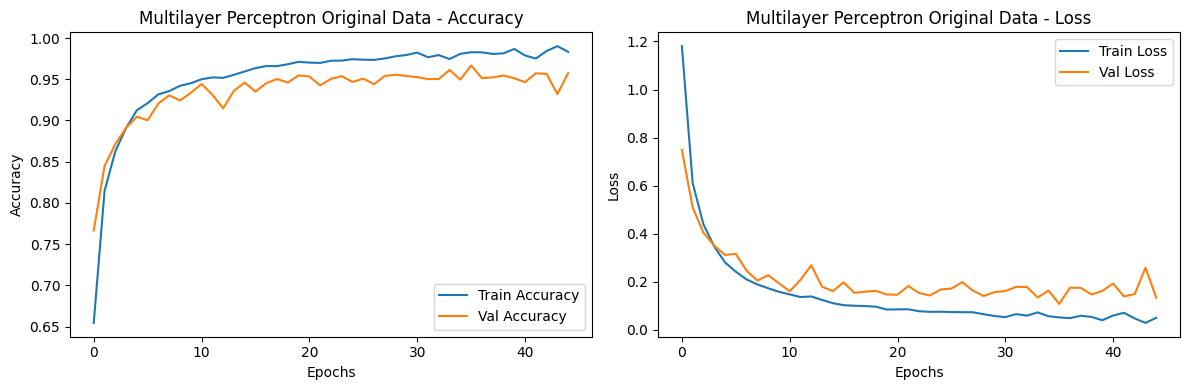

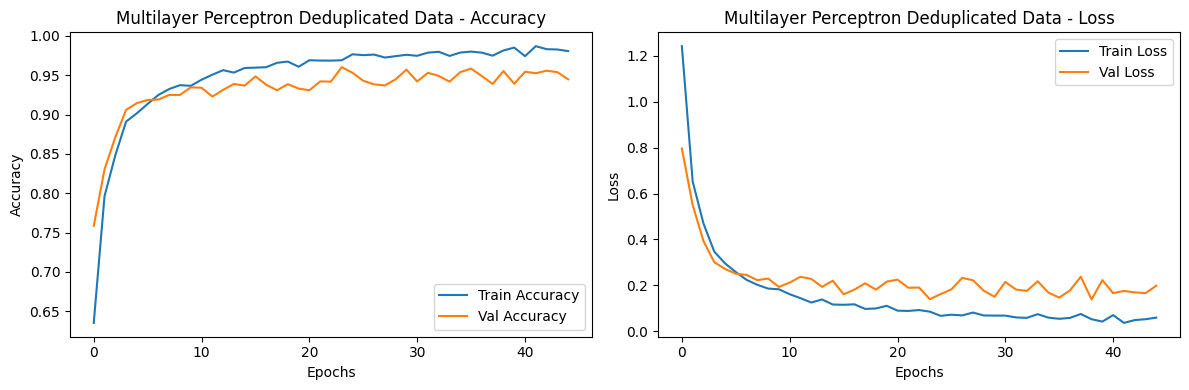

In [9]:
# Plotting

def plot(history, model_name, title): # Accuracy and Loss Comparison
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} {title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} {title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Multilayer Perceptron
plot(mlp_history, model_name="Multilayer Perceptron", title='Original Data')
plot(mlp_history_dd, model_name="Multilayer Perceptron", title='Deduplicated Data')

In [10]:
def plot_rf_cv_metrics(acc, f1, precision, recall, model_name="Random Forest", title="Original Data"):
    folds = range(1, 6)

    plt.figure(figsize=(12, 4))

    # Accuracy and F1 Score
    plt.subplot(1, 2, 1)
    plt.plot(folds, acc, label='Accuracy', marker='o')
    plt.plot(folds, f1, label='F1 Score', marker='s')
    plt.title(f'{model_name} {title} - Accuracy & F1')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(0.85, 1.00)
    plt.xticks(folds)
    plt.legend()

    # Precision and Recall
    plt.subplot(1, 2, 2)
    plt.plot(folds, precision, label='Precision', marker='^')
    plt.plot(folds, recall, label='Recall', marker='v')
    plt.title(f'{model_name} {title} - Precision & Recall')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(0.85, 1.00)
    plt.xticks(folds)
    plt.legend()

    plt.tight_layout()
    plt.show()


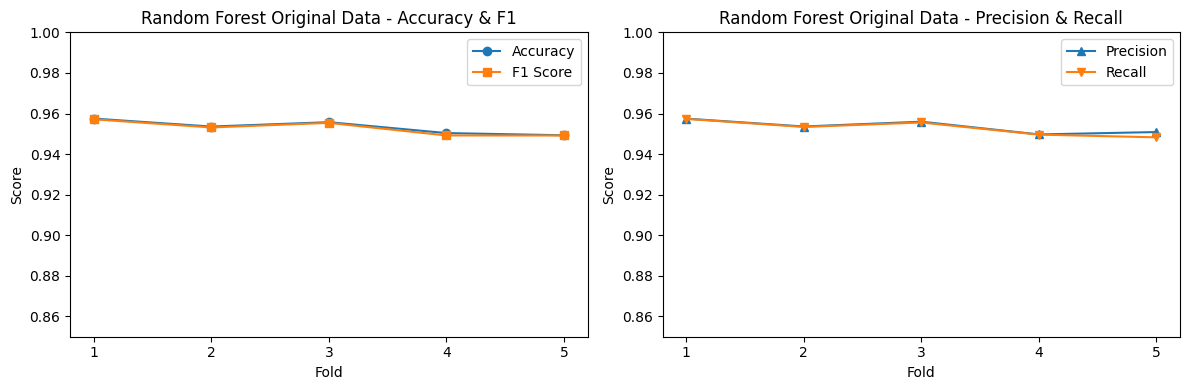

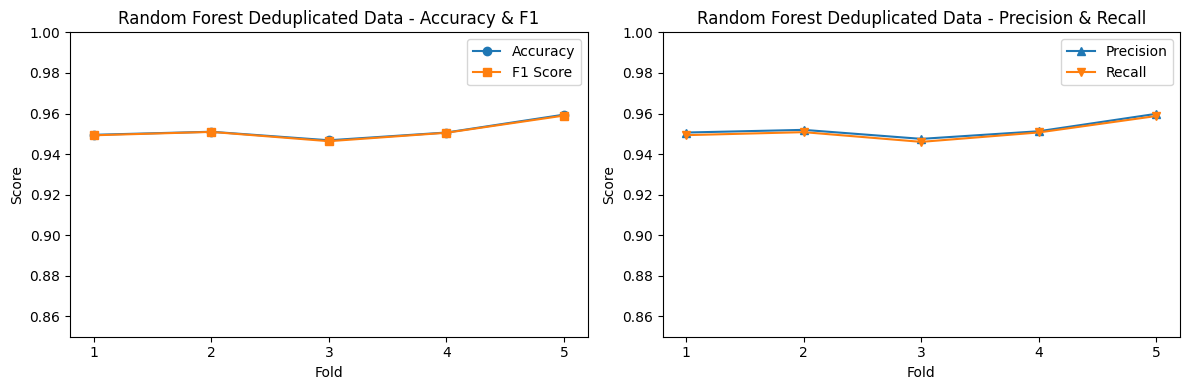

In [11]:
# Random Forest - Original
plot_rf_cv_metrics(
    rf_cval_acc,
    rf_cval_f1,
    rf_cval_precision,
    rf_cval_recall,
    model_name="Random Forest",
    title="Original Data"
)

# Random Forest - Deduplicated
plot_rf_cv_metrics(
    rf_cval_acc_dd,
    rf_cval_f1_dd,
    rf_cval_precision_dd,
    rf_cval_recall_dd,
    model_name="Random Forest",
    title="Deduplicated Data"
)


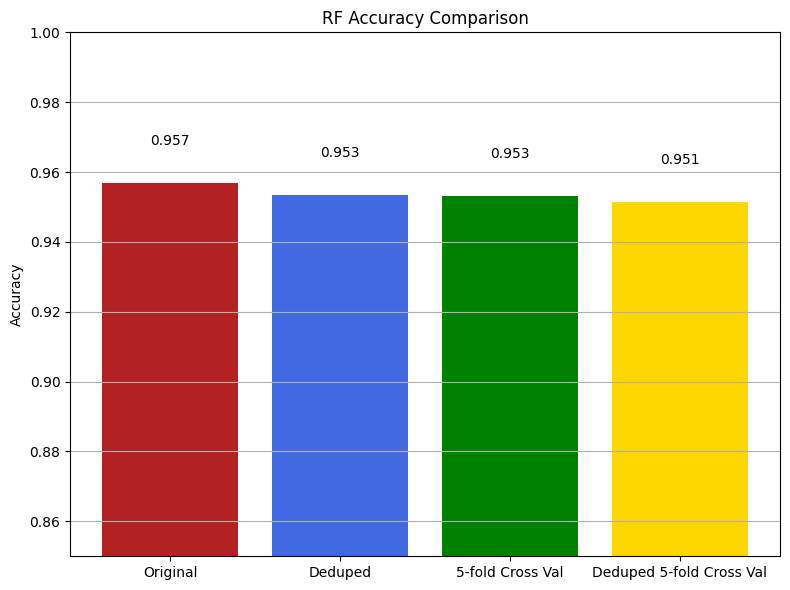

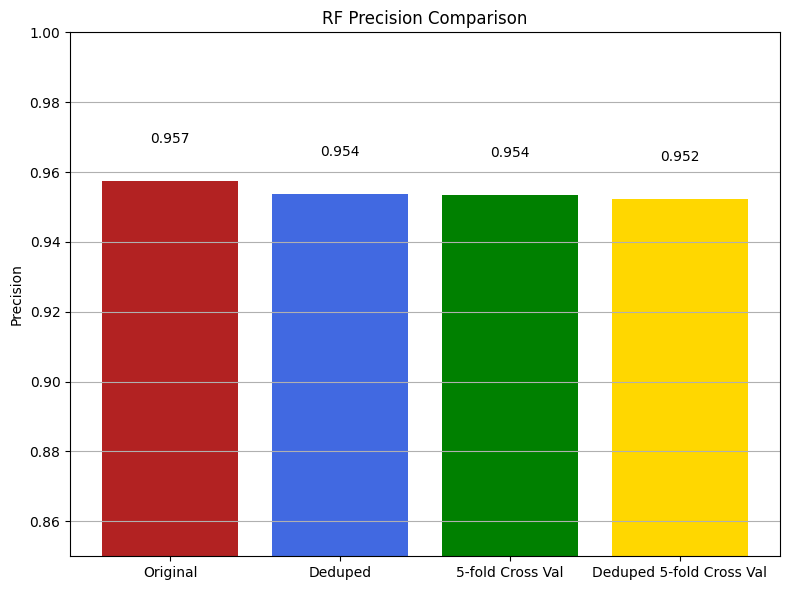

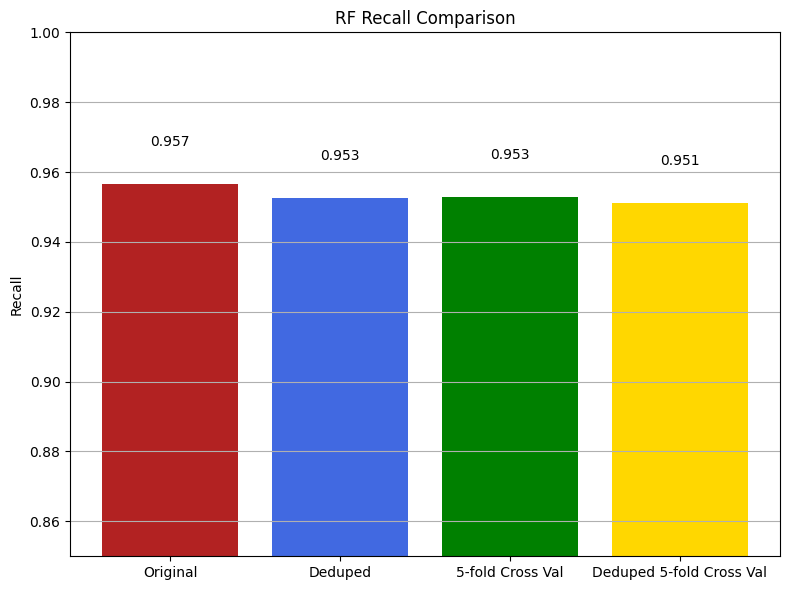

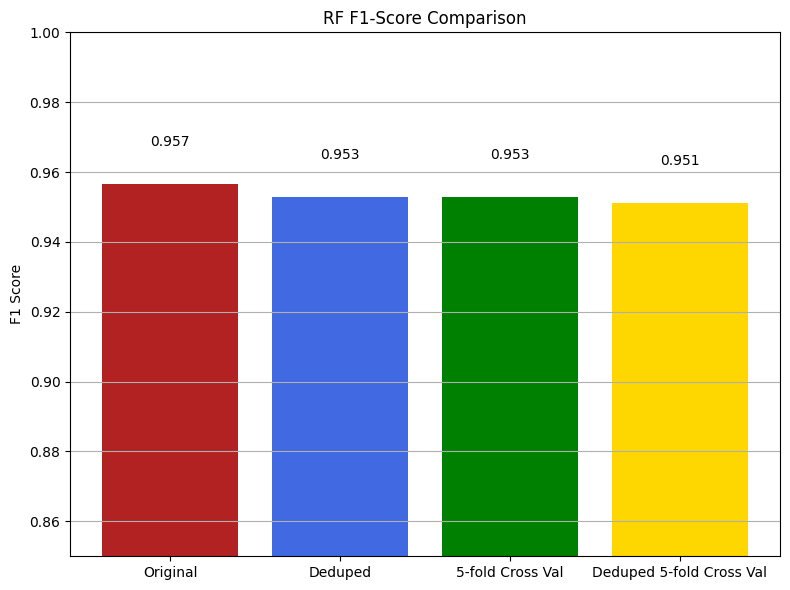

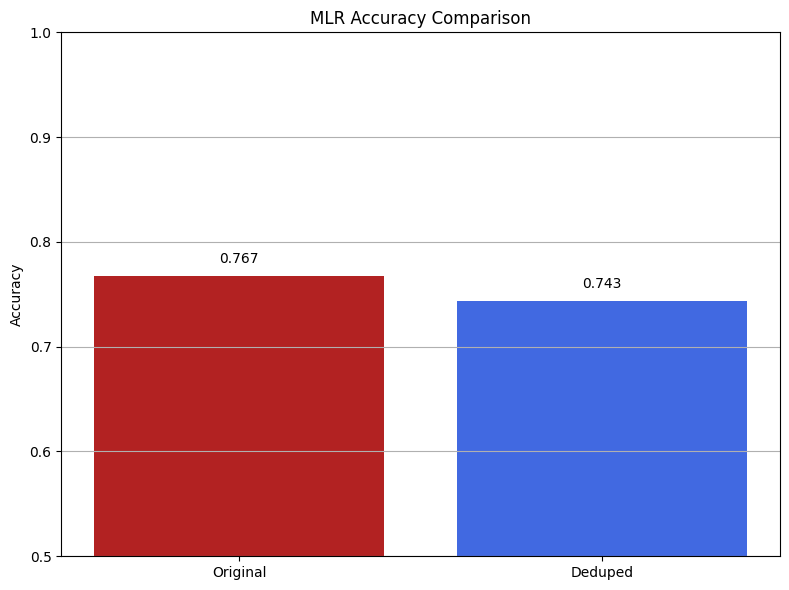

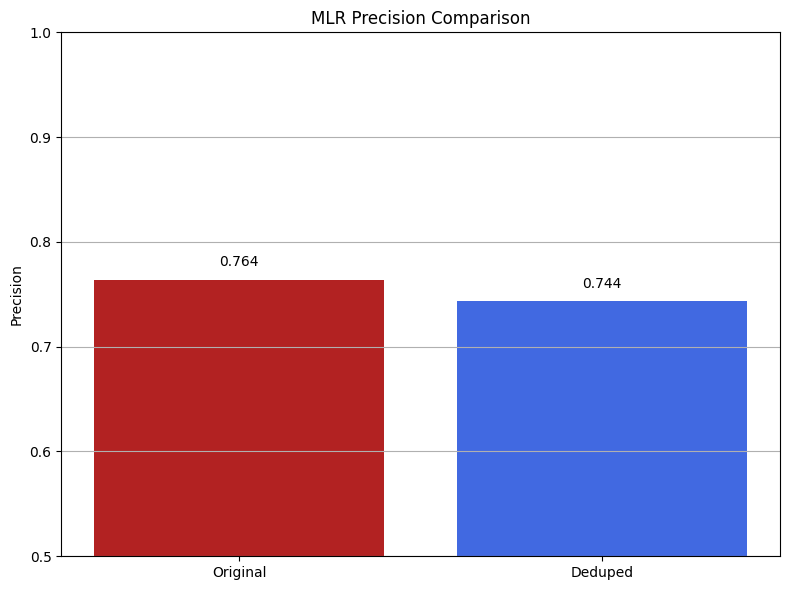

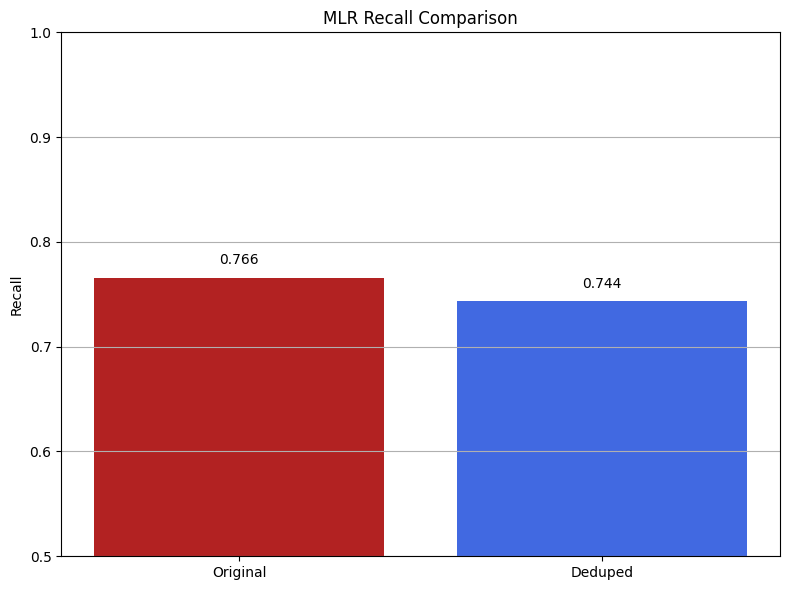

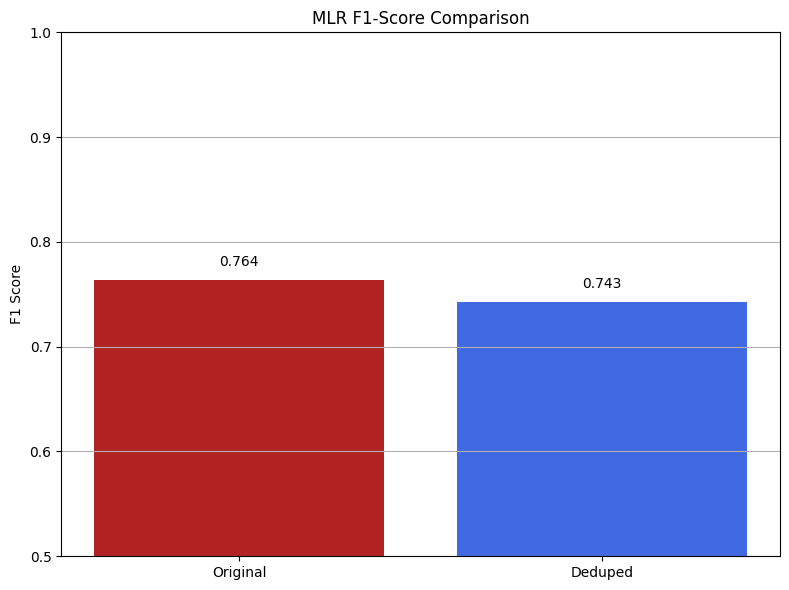

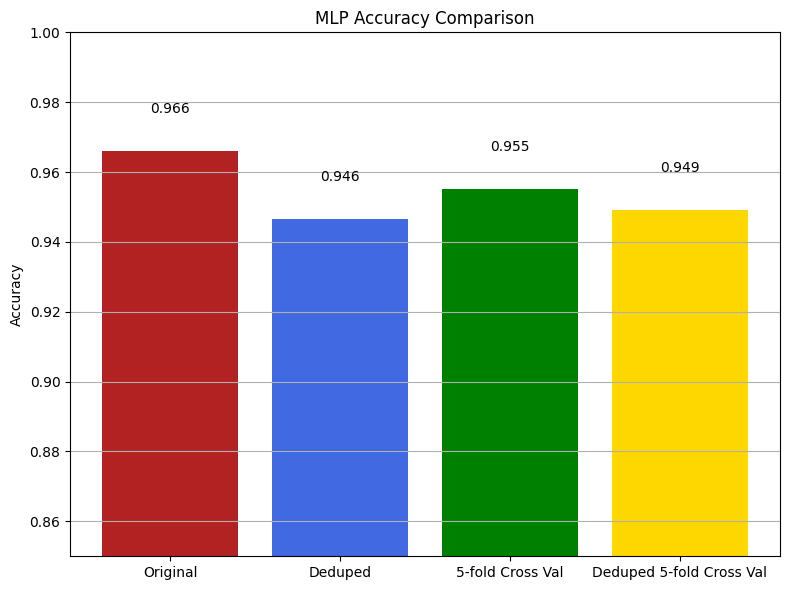

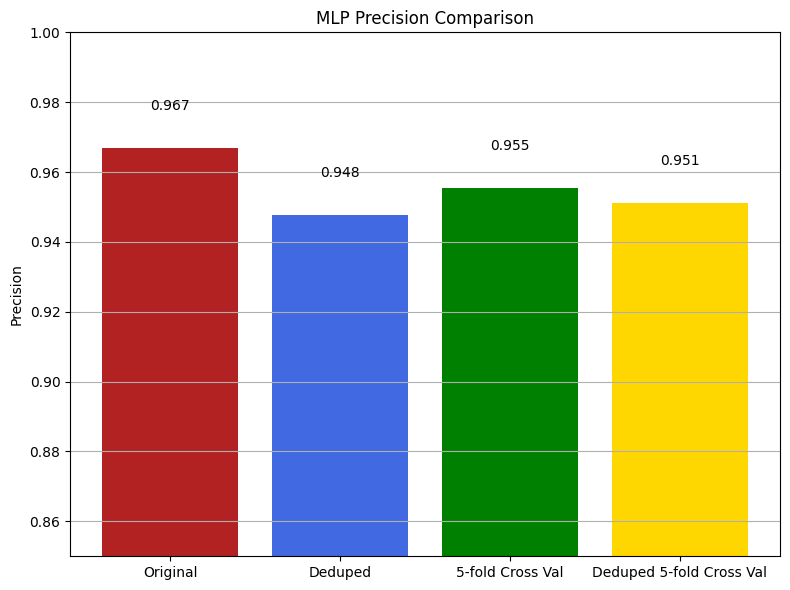

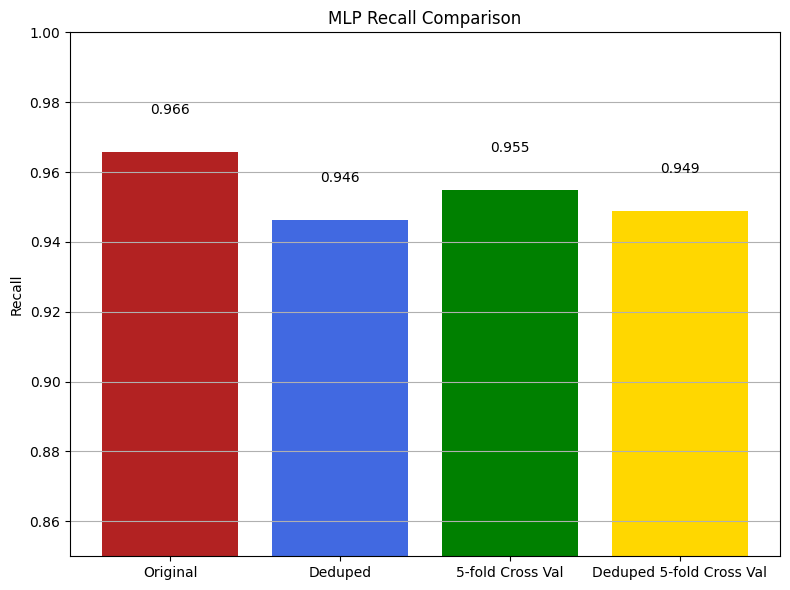

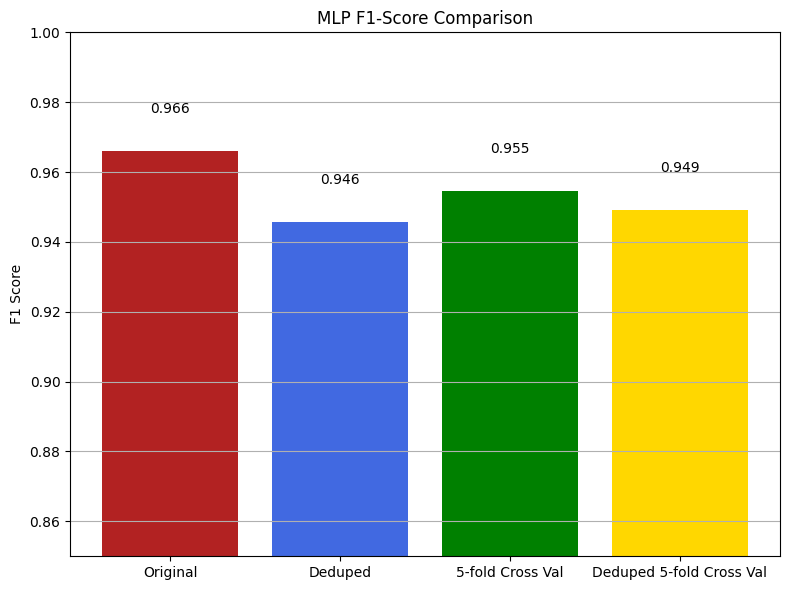

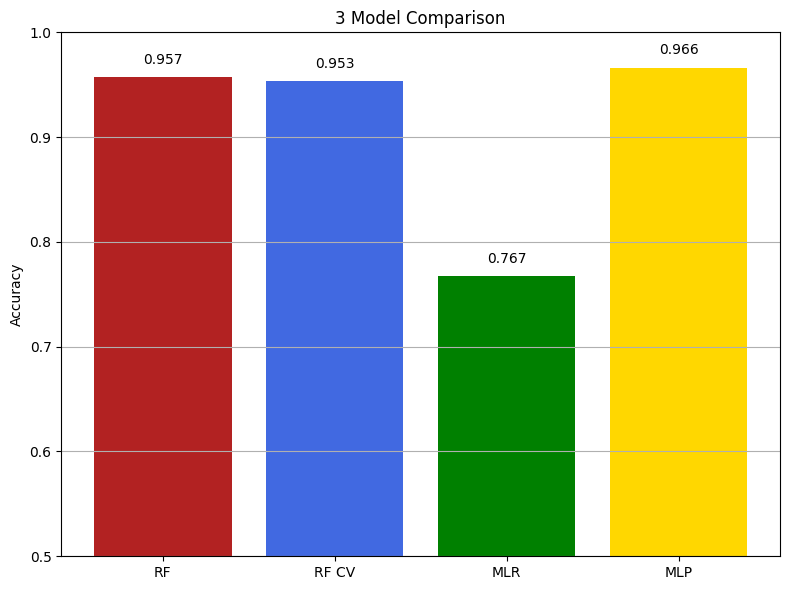

In [15]:
def plot_bar(metric_values, model_labels, title, ylabel, ylim_min): # Bar Chart Stat Comparison (acc,f1, precision, recall)
    plt.figure(figsize=(8, 6))
    bars = plt.bar(model_labels, metric_values, color=['firebrick', 'royalblue', 'green', 'gold'])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.ylim(ylim_min, 1)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Random Forest

# Random Forest
rf_labels = ['Original', 'Deduped', '5-fold Cross Val', 'Deduped 5-fold Cross Val']

plot_bar(
    [rf_test_acc, rf_test_acc_dd, rf_cv_avg_acc, rf_cv_avg_acc_dd],
    rf_labels,
    title='RF Accuracy Comparison',
    ylabel='Accuracy',
    ylim_min=0.85
)

plot_bar(
    [rf_precision, rf_precision_dd, rf_cv_avg_precision, rf_cv_avg_precision_dd],
    rf_labels,
    title='RF Precision Comparison',
    ylabel='Precision',
    ylim_min=0.85
)

plot_bar(
    [rf_recall, rf_recall_dd, rf_cv_avg_recall, rf_cv_avg_recall_dd],
    rf_labels,
    title='RF Recall Comparison',
    ylabel='Recall',
    ylim_min=0.85
)

plot_bar(
    [rf_f1, rf_f1_dd, rf_cv_avg_f1, rf_cv_avg_f1_dd],
    rf_labels,
    title='RF F1-Score Comparison',
    ylabel='F1 Score',
    ylim_min=0.85
)

# Multinomial Logistic Regression
mlr_labels = ['Original', 'Deduped']
plot_bar([mlr_test_acc, mlr_test_acc_dd], mlr_labels, title='MLR Accuracy Comparison', ylabel='Accuracy', ylim_min=0.5)
plot_bar([mlr_precision, mlr_precision_dd], mlr_labels, title='MLR Precision Comparison', ylabel='Precision', ylim_min=0.5)
plot_bar([mlr_recall, mlr_recall_dd], mlr_labels, title='MLR Recall Comparison', ylabel='Recall', ylim_min=0.5)
plot_bar([mlr_f1, mlr_f1_dd], mlr_labels, title='MLR F1-Score Comparison', ylabel='F1 Score', ylim_min=0.5)

# Multilayer Perceptron
mlp_labels = ['Original', 'Deduped', '5-fold Cross Val', 'Deduped 5-fold Cross Val']
plot_bar([mlp_test_acc, mlp_test_acc_dd, mlp_cv_avg_acc, mlp_cv_avg_acc_dd], mlp_labels, title='MLP Accuracy Comparison', ylabel='Accuracy', ylim_min=0.85)
plot_bar([mlp_precision, mlp_precision_dd, mlp_cv_avg_precision, mlp_cv_avg_precision_dd], mlp_labels, title='MLP Precision Comparison', ylabel='Precision', ylim_min=0.85)
plot_bar([mlp_recall, mlp_recall_dd, mlp_cv_avg_recall, mlp_cv_avg_recall_dd], mlp_labels, title='MLP Recall Comparison', ylabel='Recall', ylim_min=0.85)
plot_bar([mlp_f1, mlp_f1_dd, mlp_cv_avg_f1, mlp_cv_avg_f1_dd], mlp_labels, title='MLP F1-Score Comparison', ylabel='F1 Score', ylim_min=0.85)


plot_bar([rf_test_acc, rf_cv_avg_acc, mlr_test_acc, mlp_test_acc], ['RF', 'RF CV', 'MLR', 'MLP'], title='3 Model Comparison', ylabel='Accuracy', ylim_min=0.5)
